In [2]:
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from astropy.table import Table, Column, join 
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
import scipy
from collections import Counter
from os.path import expanduser
import time
import datetime
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.signal import wiener
from scipy import signal
from astropy.io import fits
import glob
from scipy.signal import savgol_filter
from astropy.io import ascii 
from numpy.polynomial import Polynomial
from scipy.interpolate import splrep, sproot, splev
#from matplotlib import rc
#rc('font', **{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
from sortedcontainers import SortedDict
import pandas

In [6]:
flare_file = '/Volumes/SaraWSSD/gaia_500pc_searches/flare_sample_full/500pc_flares.ascii'
flare_ID = np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=0, dtype= str)
mean_mag = np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=1)
change_mag = np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=2)
flare_time = np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=3)
distance_pc = np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=4)
source_energy = np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=5)
rel_flare_norm0 = np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=6)
flare_energy = np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=7)
field= np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=8,dtype= str )
gaia_g= np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=9)
gaia_bp_rp= np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=10 )
gal_lat= np.loadtxt(flare_file, unpack=True, skiprows=1,
                      usecols=11 )
gerror = np.loadtxt(flare_file, unpack=True, skiprows=1, usecols=12 )

In [8]:
flares = Table()
flares['ID'] = flare_ID
flares['mean_mag'] = mean_mag
flares['change_mag'] = change_mag
flares['duration'] = flare_time
flares['distance'] = distance_pc
flares['source_energy'] = source_energy
flares['rel_flare_norm0'] = rel_flare_norm0
flares['flare_energy'] = flare_energy
flares['field'] = field
flares['gaia_g'] = gaia_g
flares['gaia_bp_rp'] = gaia_bp_rp
flares['gal_lat'] = gal_lat
flares['Gerror'] = gerror
#flares['color_error'] = color_error
z= abs(flares['distance']*np.sin(flares['gal_lat']*(np.pi/180)))
#print(z)
flares['z'] = z
output='updated_flares_with_z.ascii'
flares.write(output, format='ascii')
print(flares)


               ID               mean_mag ... Gerror         z         
------------------------------- -------- ... ------ ------------------
DWF030050.360-545926.893_151221    18.39 ...  0.005 46.789129634211434
DWF030050.360-545926.893_151222    18.36 ...  0.005 46.789129634211434
DWF030050.360-545926.893_151218    18.38 ...  0.005 46.789129634211434
DWF030050.360-545926.893_151218    18.38 ...  0.005 46.789129634211434
DWF030159.918-550657.955_151218    17.69 ...  0.001  90.79614647420229
DWF030218.284-550124.597_151222    16.62 ... 0.0006 349.81213265669004
DWF030225.574-545707.456_151218    20.94 ... 0.0733  78.18989866297646
DWF030449.587-545831.168_151219    18.02 ... 0.0013  37.99704281021239
DWF040239.269-545106.763_151219    18.61 ... 0.0011  76.14019430444537
DWF040239.269-545106.763_150116    19.66 ... 0.0011  76.14019430444537
                            ...      ... ...    ...                ...
DWF060108.891-615641.171_150114     16.9 ... 0.0008  86.03517835649987
DWF060

# Figure 8 

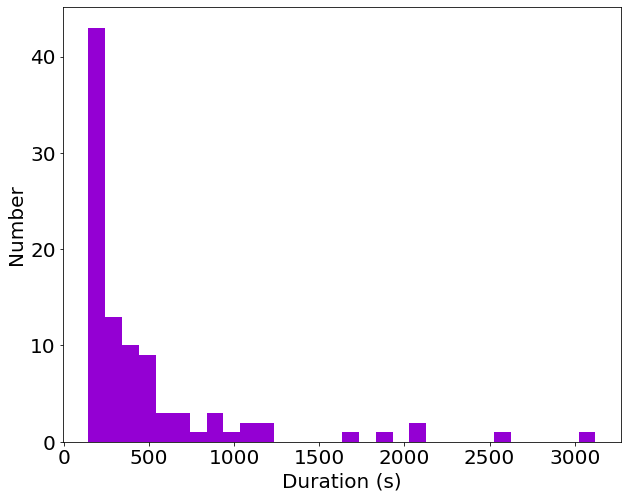

In [19]:
cm = plt.cm.get_cmap('plasma')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(10, 8))

plt.hist( flares['duration'] , bins = 30, color='darkviolet')
#cbar = plt.colorbar(sc)
#cbar.set_label('Flare Energy (ergs/s)')
plt.xlabel('Duration (s)')
plt.ylabel('Number')
#plt.yscale('log')
#plt.xscale('log')
plt.savefig('/Users/swebb/Documents/durationhist.png')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


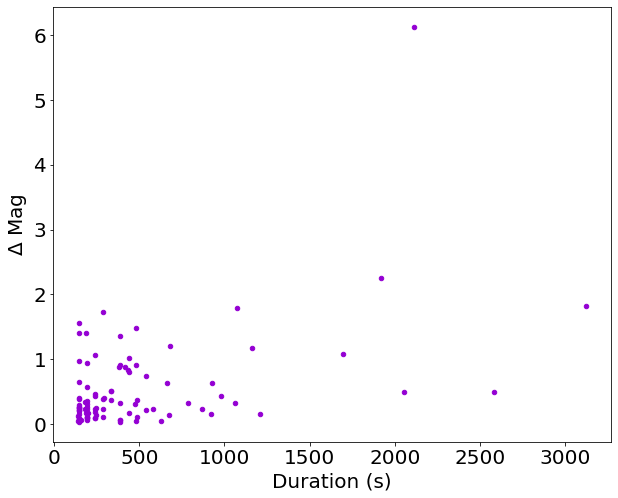

In [12]:
##### Figure 8 b, Change in mag vs duration 
cm = plt.cm.get_cmap('plasma')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(10, 8))

cm = plt.cm.get_cmap('plasma')
sc =  plt.scatter( flares['duration'] ,flares['change_mag'], s=20, color='darkviolet')
#cbar = plt.colorbar(sc)
#cbar.set_label('Flare Energy (ergs/s)')
plt.xlabel('Duration (s)')
plt.ylabel('$\Delta$ Mag')
#plt.yscale('log')
plt.savefig('/Users/swebb/Documents/magvsduration.png')

(0, 50)

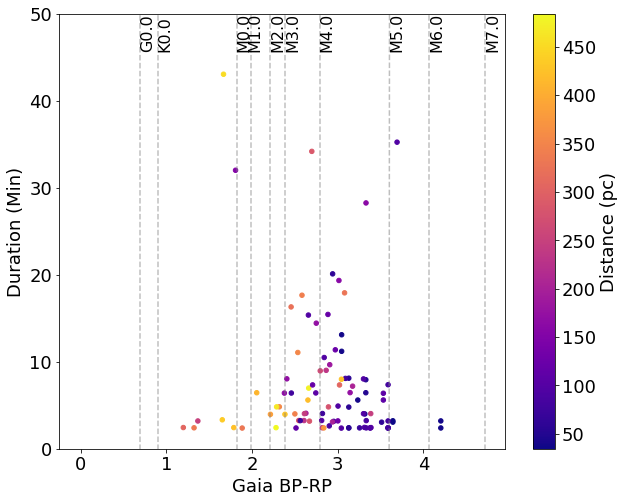

In [11]:
##### Figure 8 c, Duration vs Color 
duration_mins = flares['duration'] / 60

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

#print(duration_mins)
cm = plt.cm.get_cmap('plasma')
plt.figure(figsize=(10, 8))

plt.plot((0.54+ 0.15,0.54+0.15 ), (-0.1, 60), '--', 
                label='G0.0', alpha=0.5, color='grey')
plt.text(0.54+ 0.15, 46, 'G0.0', rotation=90, size=16)

plt.plot((0.75+ 0.15,0.75+0.15 ), (-0.1, 60), '--', 
                label='K0.0', alpha=0.5, color='grey')
plt.text(0.75+ 0.15, 46, 'K0.0', rotation=90, size=16)


plt.plot((1.67+ 0.15,1.67+ 0.15), (-0.1, 60), '--', 
                label='M0.0', alpha=0.5, color='grey')
plt.text(1.67+ 0.15, 46, 'M0.0', rotation=90, size=16)

plt.plot((1.84+ 0.15,1.84+ 0.15 ), (-0.1, 60), '--',
                label='M1.0', alpha=0.5, color='grey')
plt.text(1.84+0.1, 46, 'M1.0', rotation=90, size=16)

plt.plot((2.06+ 0.15,2.06+ 0.15 ), (-0.1, 60), '--',
                label='M2.0', alpha=0.5, color='grey')
plt.text(2.06+ 0.15, 46, 'M2.0', rotation=90, size=16)

plt.plot((2.24+ 0.15,2.24+ 0.15), (-0.1, 60), '--', 
                label='M3.0', alpha=0.5, color='grey')
plt.text(2.24+ 0.15, 46, 'M3.0', rotation=90, size=16)


plt.plot((2.644+ 0.15,2.644+ 0.15 ), (-0.1, 60), '--',
                label='M4.0', alpha=0.5, color='grey')
plt.text(2.64+ 0.15, 46, 'M4.0', rotation=90, size=16)


plt.plot((3.45+ 0.15,3.455+ 0.15 ), (-0.1, 60), '--',
                label='M5.0', alpha=0.5, color='grey')
plt.text(3.45+ 0.15, 46, 'M5.0', rotation=90, size=16)


plt.plot((3.915+ 0.15,3.915+ 0.15 ), (-0.1, 60), '--',
                label='M6.0', alpha=0.5, color='grey')
plt.text(3.915+ 0.15, 46, 'M6.0', rotation=90, size=16)


plt.plot((4.570+ 0.15,4.570+ 0.15 ), (-0.1, 60), '--',
                label='M7.0', alpha=0.5, color='grey')
plt.text(4.570+ 0.15, 46, 'M7.0', rotation=90, size=16)


sc =  plt.scatter(flares['gaia_bp_rp'], duration_mins,
                  c=flares['distance'], cmap=cm, s=20)
cbar = plt.colorbar(sc)
cbar.set_label('Distance (pc)')
plt.xlabel('Gaia BP-RP')
plt.ylabel('Duration (Min)')
plt.ylim(0,50)
##plt.yscale('log')
#plt.savefig('/Users/swebb/Documents/durationvscolor.png')

# Figure 9 

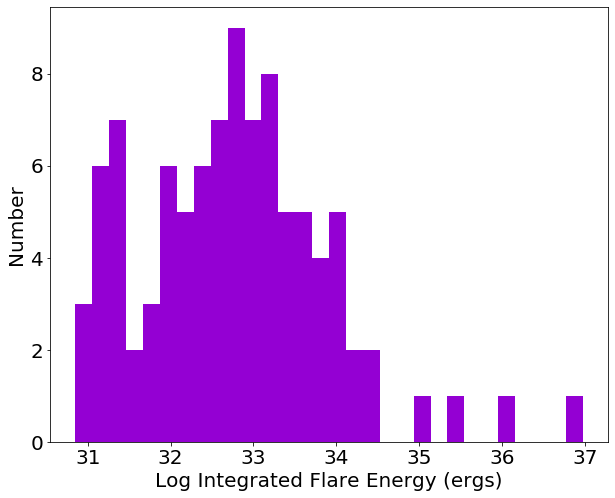

In [20]:
cm = plt.cm.get_cmap('plasma')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(10, 8))

plt.hist( np.log10(flares['flare_energy']) , bins = 30, color='darkviolet')
#cbar = plt.colorbar(sc)
#cbar.set_label('Flare Energy (ergs/s)')
plt.xlabel('Log Integrated Flare Energy (ergs)')
plt.ylabel('Number')
#plt.yscale('log')
#plt.xscale('log')
plt.savefig('/Users/swebb/Documents/energyhist.png')

# Figure 10 

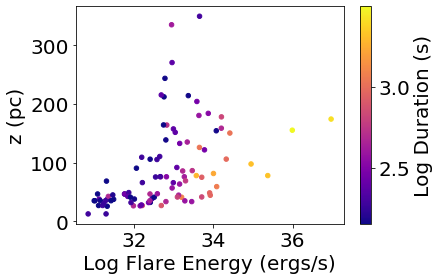

In [21]:
cm = plt.cm.get_cmap('plasma')
sc =  plt.scatter(np.log10(flares['flare_energy']),flares['z'],
                  c=np.log10(flares['duration']), cmap=cm, s=20)
cbar = plt.colorbar(sc)
cbar.set_label('Log Duration (s)')
plt.xlabel('Log Flare Energy (ergs/s)')
plt.ylabel('z (pc)')
plt.savefig('Distanceplane_vs_energy.png')

# Figure 11

[4.0094467e-30, 9.622672119999999e-30, 1.323117417e-30, 1.082550614e-31, 3.20755737e-33, 8.0188934e-35, 4.0094467000000006e-36]
5
-0.003845724895027485 13048.416293046817 -12903.827607888752
[33. 34. 35. 36. 37.]
[0.         0.69010562 0.75925697 0.71568188 0.45154499 0.150515
 0.        ]
[-29.6938496231287, -31.17179623375887, -32.60673536155264, -34.001094985398595, -35.35710322694467]


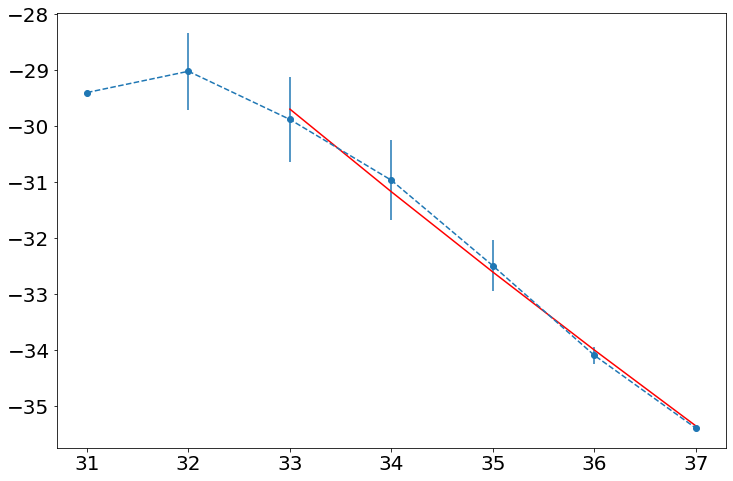

In [24]:
flare_en = (1e31, 1e32, 1e33, 1e34, 1e35, 1e36, 1e37)
numbers = (1, 24, 33, 27, 8, 2, 1)
hr_rate = (0.01331905245,0.3196572588,0.4395287308,
           0.3596144161,0.1065524196,0.0266381049,0.01331905245)
yr_rate = (40.094467,
962.267212,
1323.117417,
1082.550614,
320.755737,
80.188934,
40.094467)

dn_de = []

for i, j in zip(yr_rate, flare_en):
    dn_de.append(i/j)
print(dn_de)
error =  []
for i in numbers:
    error.append(np.sqrt(i))
#print(error)
fit_en = ( 1e+33, 1e+34, 1e+35, 1e+36, 1e+37)
fit_de_en = (1.323117417e-30, 1.082550614e-31, 3.20755737e-33, 8.0188934e-35, 4.0094467000000006e-36)

def powerlaw(x, a, b, c):
                return c + x**a * b
popt, pcov = curve_fit(powerlaw, np.log10(fit_en), np.log10(fit_de_en ), maxfev=100000)
a, b, c = popt
fit = []
for i in fit_en:
    fit.append(b*np.log10(i)**a+c)
#print(flare_en)
#print(fit)
print(len(fit_en))
print(a,b,c)

plt.figure(figsize =(12, 8))

plt.errorbar(np.log10(flare_en), np.log10(dn_de), 
             yerr=np.log10(error), fmt='o--', label='DWF Flares')
plt.plot(np.log10(fit_en), fit, 'r-', label='')
print(np.log10(fit_en ))
print(np.log10(error))
print(fit)
plt.savefig('/Users/swebb/Documents/FFD.png')

# Figure 4, 5

[1.000e+00 0.000e+00 0.000e+00 3.600e+01 9.700e+01 3.300e+01 3.500e+01
 3.300e+01 3.100e+01 7.000e+01 1.600e+02 8.330e+02 9.430e+02 1.162e+03
 8.100e+02 5.360e+02 5.630e+02 5.240e+02 6.160e+02 7.290e+02 1.221e+03
 1.427e+03 1.865e+03 1.993e+03 3.443e+03 2.794e+03 2.058e+03 1.535e+03
 6.830e+02 2.970e+02 1.490e+02 7.100e+01 3.800e+01 2.600e+01 2.800e+01
 1.600e+01 1.600e+01 1.700e+01 9.000e+00 2.000e+00 2.000e+00 1.000e+00
 7.400e+01 1.000e+00 3.000e+00 2.000e+00 1.000e+00 2.000e+00 1.700e+01
 3.580e+02] [-0.7     -0.57336 -0.44672 -0.32008 -0.19344 -0.0668   0.05984  0.18648
  0.31312  0.43976  0.5664   0.69304  0.81968  0.94632  1.07296  1.1996
  1.32624  1.45288  1.57952  1.70616  1.8328   1.95944  2.08608  2.21272
  2.33936  2.466    2.59264  2.71928  2.84592  2.97256  3.0992   3.22584
  3.35248  3.47912  3.60576  3.7324   3.85904  3.98568  4.11232  4.23896
  4.3656   4.49224  4.61888  4.74552  4.87216  4.9988   5.12544  5.25208
  5.37872  5.50536  5.632  ] <a list of 1 Patch object

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<Figure size 864x576 with 0 Axes>

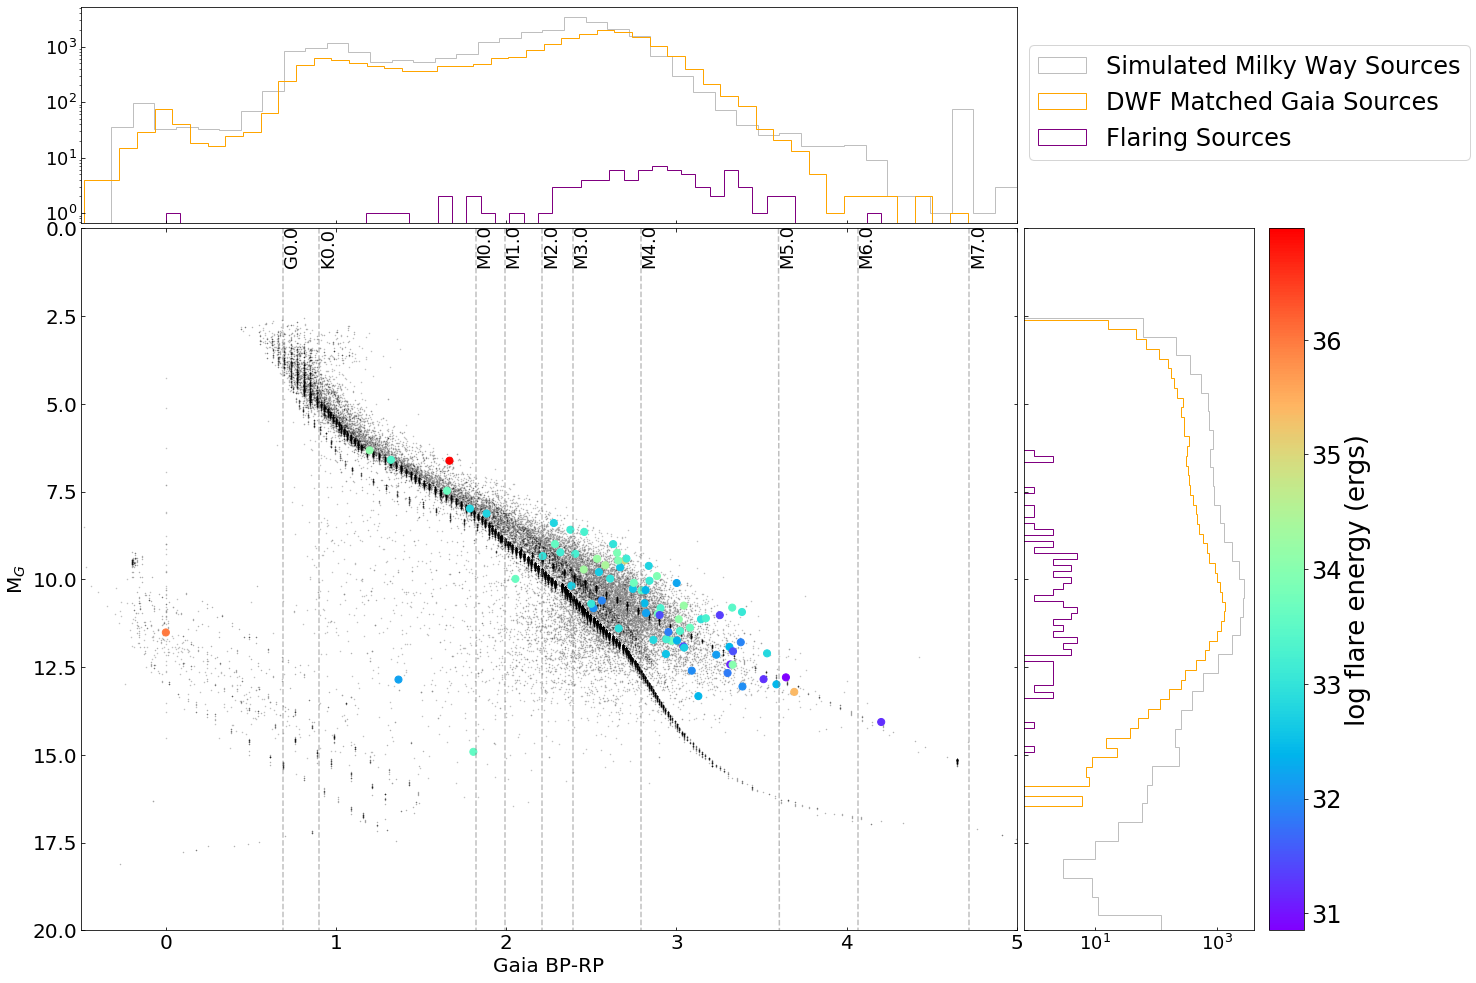

In [37]:
all_sources = '/Volumes/SaraWSSD/gaia_500pc_searches/files_for_plots/500pc_stars_dwf_gaia_matched.ascii'
RA, DEC, PLX, PLX_e, Gmag, Gcolor, gal_lat = np.loadtxt(all_sources, unpack=True, skiprows=1)

full500pc_sources = '/Volumes/SaraWSSD/gaia_500pc_searches/files_for_plots/500pc_sample_sourcesonly.ascii'
ID_500, PLX_500, Gmag_500, Gcolor_500, duration, flare_energy, Gerror, Color_error, rel_output, gal_500_lat = np.loadtxt(full500pc_sources, unpack=True, skiprows=1)

all_sources_pc_full = 1000/PLX
all_sources_Gmag = []
all_sources_Gcolor = []
all_sources_pc_cut = []

for i, j, k in zip(all_sources_pc_full, Gmag, Gcolor):
    if 0 < i <500:
        all_sources_pc_cut.append(i)
        all_sources_Gmag.append(j)
        all_sources_Gcolor.append(k)
        
all_sources_100pc_full = 1000/PLX
all_sources_100pc_Gmag = []
all_sources_100pc_Gcolor = []
all_sources_100pc_cut = []

for i, j, k in zip(all_sources_100pc_full, Gmag, Gcolor):
    if 1 < i <100:
        all_sources_100pc_cut.append(i)
        all_sources_100pc_Gmag.append(j)
        all_sources_100pc_Gcolor.append(k)
        
full500pc_sources_pc_full = 1000/PLX_500
full500pc_sources_Gmag = []
full500pc_sources_Gcolor = []
full500pc_sources_pc_cut = []

for i, j, k in zip(full500pc_sources_pc_full, Gmag_500, Gcolor_500):
    if 1 < i <500:
        full500pc_sources_pc_cut.append(i)
        full500pc_sources_Gmag.append(j)
        full500pc_sources_Gcolor.append(k)
        
full100pc_sources_pc_full = 1000/PLX_500
full100pc_sources_Gmag = []
full100pc_sources_Gcolor = []
full100pc_sources_pc_cut = []

for i, j, k in zip(full500pc_sources_pc_full, Gmag_500, Gcolor_500):
    if 1 < i <100:
        full100pc_sources_pc_cut.append(i)
        full100pc_sources_Gmag.append(j)
        full100pc_sources_Gcolor.append(k)
        
all_sources_Amag = []

for i, j in zip(all_sources_Gmag,all_sources_pc_cut):
    all_sources_Amag.append(i-(5*np.log10(j)-5))
    
all_sources_100pc_Amag = []

for i, j in zip(all_sources_100pc_Gmag,all_sources_100pc_cut):
    all_sources_100pc_Amag.append(i-(5*np.log10(j)-5))
    
full500pc_sources_Amag = []
full500pc_sources_Amag_error = []
full500pc_sources_Amag_colorerror =[]
for i, j, k, l in zip(full500pc_sources_Gmag,full500pc_sources_pc_cut, Gerror, Color_error):
    full500pc_sources_Amag.append(i-(5*np.log10(j)-5)) 
    full500pc_sources_Amag_error.append(k-(5*np.log10(j)-5))
    full500pc_sources_Amag_colorerror.append(l)
    
full100pc_sources_Amag = []

for i, j in zip(full100pc_sources_Gmag,full100pc_sources_pc_cut):
    full100pc_sources_Amag.append(i-(5*np.log10(j)-5)) 
    
figFont = {'fontname':'Georgia', 'size':'18'}
fig = plt.figure(figsize=(12,8))
cm = plt.cm.get_cmap('plasma')
cmm = plt.cm.get_cmap('rainbow')
gmag_sim, r, v_i_input = np.loadtxt('/Volumes/SaraWSSD/gaia_500pc_searches/scripts/gaia_sim_full.ascii', skiprows=1, unpack=True)

v_i = v_i_input + 0.15
abs_magnitude = []

for i, j in zip(gmag_sim,r):
    abs_magnitude.append(i-(5*np.log10(j)-5))
#plt.hist(abs_magnitude, bins=15)    

v_i_cuts = []
abs_mag_sim_cuts = []

gaia_color_all_cuts = []
abs_mag_gaia_cuts = []

gaia_color_flare_cuts = []
abs_mag_flare_cuts = []



mag_cut = 21

for i, j in zip(v_i, abs_magnitude):
    if j < mag_cut:
        v_i_cuts.append(i)
        abs_mag_sim_cuts.append(j)
        
for i, j in zip(all_sources_Gcolor, all_sources_Amag):
    if j < mag_cut:
        gaia_color_all_cuts.append(i)
        abs_mag_gaia_cuts.append(j)
        
for i, j in zip(full500pc_sources_Gcolor, full500pc_sources_Amag):
    if j < mag_cut:
        gaia_color_flare_cuts.append(i)
        abs_mag_flare_cuts.append(j)
        

#bins = np.linspace(-0.5, 5.5, 30)
#bins = 50
#plt.hist(abs_mag_sim_cuts,  histtype='step', bins= bins, label='gaia sims')
#plt.hist(abs_mag_gaia_cuts,bins=bins, histtype='step', color='orange', label='gaia matched DWF')
#plt.xlabel('Abs G mag')
#plt.ylabel('number')
#plt.legend()
#plt.yscale('log')
#print('Gaia sources in sample:' + str(len(gaia_color_all_cuts)))
#print('Simulated expected sources:' + str(len(v_i_cuts)))

#plt.scatter(all_sources_Gcolor,all_sources_Amag, s=0.01, 
 #           color= 'grey', marker='x', label='Gaia Sources <500pc')

#cc = plt.scatter(full500pc_sources_Gcolor,full500pc_sources_Amag,
  #                c=np.log10(flare_energy), cmap=cmm, s=20, marker='o', label='DWF Flares')

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize=(20, 15))

ax_scatter = plt.axes(rect_scatter,xlim=(-0.5, 5), ylim=(20,0),  xlabel='Gaia BP-RP', ylabel='M$_{G}$' )
ax_scatter.tick_params(direction='in', top=True, right=True)

ax_histx = plt.axes(rect_histx, xlim=(-0.5, 5), yscale='log')
ax_histx.tick_params(direction='in', labelbottom=False)


ax_histy = plt.axes(rect_histy, xscale='log', ylim=(20,0))
ax_histy.tick_params(direction='in', labelleft=False)


plt.setp(ax_scatter.get_xticklabels(), fontsize=20)
plt.setp(ax_scatter.get_yticklabels(), fontsize=20)

plt.setp(ax_histx.get_xticklabels(), fontsize=18)
plt.setp(ax_histx.get_yticklabels(), fontsize=18)

plt.setp(ax_histy.get_xticklabels(), fontsize=18)
plt.setp(ax_histy.get_yticklabels(), fontsize=18)

#ax_scatter.plot((-0.31+0.2,-0.31+0.2 ), (0.0, 20), '--', label='B0.0')
#ax_scatter.plot((-0.04+0.2,-0.04+0.2 ), (0.0, 20), '--', label='A0.0')
#ax_scatter.plot((0.28+0.2,0.28+0.2 ), (0.0, 20), '--', label='F0.0')




ax_scatter.plot((0.54+ 0.15,0.54+0.15 ), (0.0, 20), '--', 
                label='G0.0', alpha=0.5, color='grey')
ax_scatter.text(0.54+ 0.15, 1, 'G0.0', rotation=90, size=18)

ax_scatter.plot((0.75+ 0.15,0.75+0.15 ), (0.0, 20), '--', 
                label='K0.0', alpha=0.5, color='grey')
ax_scatter.text(0.75+ 0.15, 1, 'K0.0', rotation=90, size=18)


ax_scatter.plot((1.67+ 0.15,1.67+ 0.15), (0.0, 20), '--', 
                label='M0.0', alpha=0.5, color='grey')
ax_scatter.text(1.67+ 0.15, 1, 'M0.0', rotation=90, size=18)

ax_scatter.plot((1.84+ 0.15,1.84+ 0.15 ), (0.0, 20), '--',
                label='M1.0', alpha=0.5, color='grey')
ax_scatter.text(1.84+0.15, 1, 'M1.0', rotation=90, size=18)

ax_scatter.plot((2.06+ 0.15,2.06+ 0.15 ), (0.0, 20), '--',
                label='M2.0', alpha=0.5, color='grey')
ax_scatter.text(2.06+ 0.15, 1, 'M2.0', rotation=90, size=18)

ax_scatter.plot((2.24+ 0.15,2.24+ 0.15), (0.0, 20), '--', 
                label='M3.0', alpha=0.5, color='grey')
ax_scatter.text(2.24+ 0.15, 1, 'M3.0', rotation=90, size=18)


ax_scatter.plot((2.644+ 0.15,2.644+ 0.15 ), (0.0, 20), '--',
                label='M4.0', alpha=0.5, color='grey')
ax_scatter.text(2.64+ 0.15, 1, 'M4.0', rotation=90, size=18)


ax_scatter.plot((3.45+ 0.15,3.455+ 0.15 ), (0.0, 20), '--',
                label='M5.0', alpha=0.5, color='grey')
ax_scatter.text(3.45+ 0.15, 1, 'M5.0', rotation=90, size=18)


ax_scatter.plot((3.915+ 0.15,3.915+ 0.15 ), (0.0, 20), '--',
                label='M6.0', alpha=0.5, color='grey')
ax_scatter.text(3.915+ 0.15, 1, 'M6.0', rotation=90, size=18)


ax_scatter.plot((4.570+ 0.15,4.570+ 0.15 ), (0.0, 20), '--',
                label='M7.0', alpha=0.5, color='grey')
ax_scatter.text(4.570+ 0.15, 1, 'M7.0', rotation=90, size=18)


#ax_scatter.plot((4.5080+0.2,4.508+0.2 ), (0.0, 20), '--', label='M8.0')

#ax_scatter.errorbar(full500pc_sources_Gcolor,full500pc_sources_Amag, xerr=full500pc_sources_Amag_colorerror, 
 #            fmt='.k', alpha=0.2, markercolor=None)

ax_scatter.scatter(all_sources_Gcolor,all_sources_Amag, s=1, alpha=0.5,
            color= 'grey', marker='.', label='DWF Matched Gaia Sources <500pc')


ax_scatter.scatter(v_i,abs_magnitude, s=1, alpha=0.3,
                   color= 'black', marker='.', label='Simulated Milky Way Sources')

#ax_scatter.errorbar(full500pc_sources_Gcolor,full500pc_sources_Amag, xerr=full500pc_sources_Amag_colorerror, fmt='.k', alpha=0.2, markercolor=None)
cc =ax_scatter.scatter(full500pc_sources_Gcolor,full500pc_sources_Amag,
                  c=np.log10(flare_energy), cmap=cmm, s=50, marker='o', label='Flaring Sources')



#ax_scatter.legend(markerscale=2,fontsize=20)
#plt.xlabel('Gaia BP-RP')
#plt.ylabel('M$_{G}$')


bins = 50
x, y, z = ax_histx.hist(v_i_cuts, bins=bins,  histtype='step' , color='grey', 
                        alpha =0.5, label='Simulated Milky Way Sources')
print(x,y,z)

x, y, z = ax_histx.hist(gaia_color_all_cuts,histtype='step',  bins=bins, color='orange', alpha =1,
              label='DWF Matched Gaia Sources')

ax_histx.hist(gaia_color_flare_cuts, histtype='step', bins=bins, color='purple', 
              alpha =1, label='Flaring Sources')




ax_histy.hist(abs_magnitude, bins=bins, histtype='step', orientation='horizontal',  
              color='grey', alpha =0.5,  label='Simulated Milky Way Sources')

ax_histy.hist(all_sources_Amag, bins=bins, histtype='step', orientation='horizontal',  
              color='orange', alpha =1,  label='DWF Matched Gaia Sources')

ax_histy.hist(full500pc_sources_Amag, bins=bins, histtype='step', orientation='horizontal', 
              color='purple', alpha =1, label='Flaring Sources')
ax_histx.legend(prop={'size': 24}, bbox_to_anchor=(1.00, 0.88), fontsize=20)

#ax_histy.legend()

#cbar = plt.colorbar(sc)
cbarr = plt.colorbar(cc)
#plt.xscale('log')
#plt.gca().invert_yaxis()
#plt.legend()
#cbar.set_label('Distance for all Gaia sources (pc)')
cbarr.set_label('log flare energy (ergs)',  size=26)
cbarr.ax.tick_params(labelsize=24) 

#plt.title('Gaia stars within 500pc')
plt.savefig('/Users/swebb/Documents/CMD_gaia_cmap_reloutput.png')

In [38]:
G0_sample = []
G0_flares = []

k0_sample = []
k0_flares = []

m0_sample = []
m0_flares = []

m1_sample = []
m1_flares = []

m2_sample = []
m2_flares = []

m3_sample = []
m3_flares = []

m4_sample = []
m4_flares = []


m5_sample = []
m5_flares = []


m6_sample = []
m6_flares = []

m7_sample = []
m7_flares = []


for i in all_sources_Gcolor:
    if 0.54+ 0.15 <= i <= 0.75+0.15:
        G0_sample.append(i)
    if 0.75+0.15<= i <= 1.67+0.15:
        k0_sample.append(i)
    if 1.67+0.15 <= i <= 1.84+0.15:
        m0_sample.append(i)
    if 1.84+0.15 <= i <= 2.06+0.15:
        m1_sample.append(i)
    if 2.06+0.15 <= i <= 2.24+0.15:
        m2_sample.append(i)
    if 2.24+0.15 <= i <= 2.43+0.15:
        m3_sample.append(i)
    if 2.43+0.15 <= i <= 3.45+0.15:
        m4_sample.append(i)
    if 3.45+0.15 <= i <= 3.915+0.15:
        m5_sample.append(i)
    if 3.915+0.15 <= i <= 4.570+0.15:
        m6_sample.append(i)
    if 4.570+0.15 <= i <= 4.508+0.15:
        m7_sample.append(i)
        
        
for i in full500pc_sources_Gcolor:
    if 0.54+0.15 <= i <= 0.75+0.15:
        G0_flares.append(i)
    if 0.75+0.15 <= i <= 1.67+0.15:
        k0_flares.append(i)
    if 1.67+0.15 <= i <= 1.84+0.15:
        m0_flares.append(i)
    if 1.84+0.15 <= i <= 2.06+0.15:
        m1_flares.append(i)
    if 2.06+0.15 <= i <= 2.24+0.15:
        m2_flares.append(i)
    if 2.24+0.15 <= i <= 2.43+0.15:
        m3_flares.append(i)
    if 2.43+0.15 <= i <= 3.45+0.15:
        m4_flares.append(i)
    if 3.45+0.15 <= i <= 3.915+0.15:
        m5_flares.append(i)
    if 3.915+0.15 <= i <= 4.570+0.15:
        m6_flares.append(i)
    if 4.570+0.15 <= i <= 4.508+0.15:
        m7_flares.append(i)

print('G0 Full:  '+ str(len(G0_sample)))
print('G0 Flares:  ' + str(len(G0_flares)))


print('k0 Full:  '+ str(len(k0_sample)))
print('k0 Flares:  '+ str(len(k0_flares)))

print('m0 Full:  '+ str(len(m0_sample)))
print('m0 flares:  '+ str(len(m0_flares)))


print('m1 Full:  '+ str(len(m1_sample)))
print('m1 flares:  '+ str(len(m1_flares)))



print('m2 Full:  '+ str(len(m2_sample)))
print('m2 flares:  '+ str(len(m2_flares)))


print('m3 Full:  '+ str(len(m3_sample)))
print('m3 flares:  '+ str(len(m3_flares)))



print('m4 Full:  '+ str(len(m4_sample)))
print('m4 flares:  '+ str(len(m4_flares)))




print('m5 Full:  '+ str(len(m5_sample)))
print('m5 flares:  '+ str(len(m5_flares)))

print('m6 Full:  '+ str(len(m6_sample)))
print('m6 flares:  '+ str(len(m6_flares)))


print('m7 Full:  '+ str(len(m7_sample)))
print('m7 flares:  '+ str(len(m7_flares)))

G0 Full:  828
G0 Flares:  0
k0 Full:  4062
k0 Flares:  7
m0 Full:  903
m0 flares:  1
m1 Full:  1559
m1 flares:  1
m2 Full:  2078
m2 flares:  6
m3 Full:  3155
m3 flares:  8
m4 Full:  6920
m4 flares:  52
m5 Full:  38
m5 flares:  2
m6 Full:  7
m6 flares:  1
m7 Full:  0
m7 flares:  0


In [39]:
types =  ('G0', 'K0', 'M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6')
full_numbers = (828, 4062 ,903, 1559, 2078,3155, 6920, 38,7)
flare_numbers = (0,7, 1, 1, 6, 8, 55, 3, 1 )
print(sum(flare_numbers))
fraction = []
percentage = []
for i, j in zip(flare_numbers, full_numbers):
    fraction.append(i/j)
    percentage.append(i/j*100)
    
print(percentage)

82
[0.0, 0.17232890201870998, 0.11074197120708748, 0.06414368184733803, 0.28873917228103946, 0.25356576862123614, 0.7947976878612716, 7.894736842105263, 14.285714285714285]


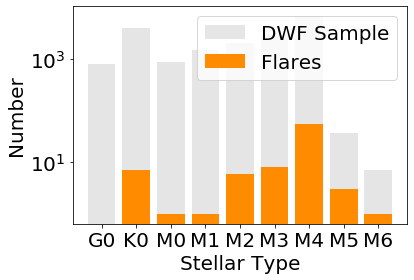

In [40]:
plt.bar(types, full_numbers, color='grey', alpha=0.2, label='DWF Sample')
plt.bar(types, flare_numbers, color='darkorange', label='Flares')
plt.legend()
plt.yscale('log')
plt.xlabel('Stellar Type')
plt.ylabel('Number')
plt.savefig('/Users/swebb/Documents/number_vs_stellartype.png')

[0.0, 0.0017232890201870998, 0.0011074197120708748, 0.0006414368184733803, 0.0028873917228103944, 0.0025356576862123614, 0.007947976878612716, 0.07894736842105263, 0.14285714285714285]


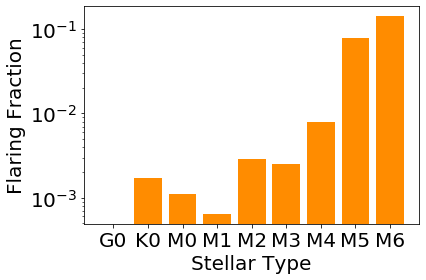

In [41]:
plt.bar(types, fraction, color='darkorange')
print(fraction)
#plt.yscale('log')
plt.xlabel('Stellar Type')
plt.ylabel('Flaring Fraction')
plt.yscale('log')
#plt.savefig('/Users/swebb/Documents/flaringfraction.png')



# Figure 7 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


/Users/swebb/Downloads/500pcflares.csv
[ 73.83833834  39.89754311  61.94443584  50.75137409  50.75137409
  58.25774391  58.25774391  58.25774391  58.25774391 113.0518343
 435.55904     97.35486823  47.31017973 108.1443511  108.1443511
 476.235832   384.7041625   38.54871787  38.54871787  38.51041707
  38.51041707  97.66864934 233.3885686   96.63329597 427.8990158
  60.57962586 162.2138952  353.7318712   89.61537083 170.7242121
 306.7202405  484.0505349  131.3905057  155.1109043  425.6224729
 119.4429182  203.9858842  185.3980496  119.9716867   34.35434445
  34.35434445 282.6935037  246.3357556  202.9303137  101.5929779
 453.8234627  404.498018   287.8360486  328.1485857  111.8718396
 286.9605142  122.2568617   94.21518749 323.5512991   81.13129477
 201.1546276  263.7826431   98.85525613 423.1013328  232.5797749
 173.6714137   69.57150908 164.4520458  356.7733419  159.2508838
 345.8053807  107.439082    97.22141204  97.22141204 419.4806829
 411.3364321  465.5926995  277.8395199   85.742

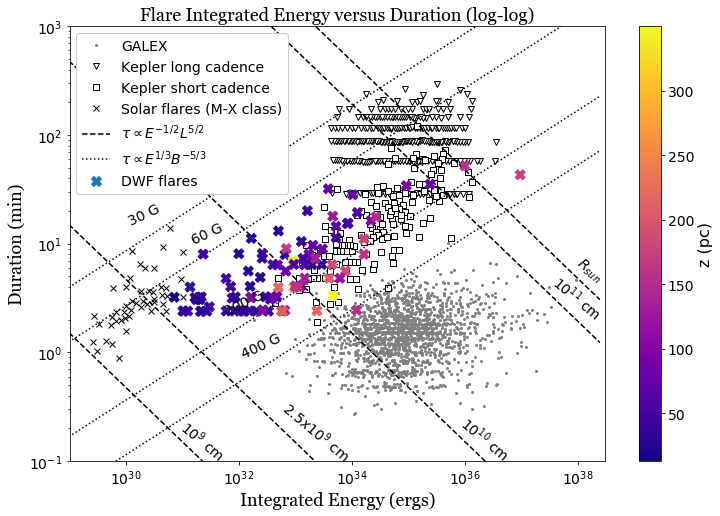

In [43]:
import os
import sys

import numpy as np
import numpy.ma as ma

import matplotlib
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter 

from astropy.table import Table, Column, join, vstack, unique
from astropy import units as u
from astropy.io import fits,ascii
from astropy.constants import R_sun

# Namekata et al data
keplerlong = Table.read("namekata2018_keplerlong.csv",format="ascii.fast_no_header",names=["E","D"])
keplershort = Table.read("namekata2018_keplershort.csv",format="ascii.fast_no_header",names=["E","D"])
solarwlf = Table.read("namekata2018_solarwlf.csv",format="ascii.fast_no_header",names=["E","D"])

# Brasseur et al data (table 2 from paper)
flareStats = Table.read("final_table_2.ecsv", format="ascii.ecsv")

filename ='/Users/swebb/Downloads/500pcflares.csv'
print(filename)
#filename,mean_mag, change_mag, flare_time, gaia_ID, G_mag,BP_RP, parallex,pc,source_flux, rel_output,r_i,g_r,J_K,H_K,field = np.loadtxt(filename, skiprows=1, unpack =True)
#dwf_id = np.loadtxt(filename, skiprows=1, usecols= 0, unpack =True, dtype =str)
flare_time_sec = np.loadtxt(filename,  skiprows=1, usecols= 0)
flare_ergs= np.loadtxt(filename,  skiprows=1, usecols= 1)
#total_flare_ergs= np.loadtxt(filename,  skiprows=1, usecols= 2)
distance_cm= np.loadtxt(filename,  skiprows=1, usecols= 2)
distance = np.loadtxt(filename,  skiprows=1, usecols= 3)
gal_dec = np.loadtxt(filename,  skiprows=1, usecols= 4)
print(distance)

z= abs(distance*np.sin(gal_dec*(np.pi/180)))
figFont = {'fontname':'Georgia', 'size':'18'}
    
fig = plt.figure(figsize=(12,8))
fig.set_facecolor('w')

ax1 = fig.add_subplot(111)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.set_xscale("log")
ax1.set_yscale("log")

# graph energies

ax1.plot(flareStats['E_est'], (flareStats['End']-flareStats['Start'])/60, marker='.',linestyle='None', markersize=4, 
         markerfacecolor='grey', markeredgecolor="grey", label="GALEX") 

ax1.plot(keplerlong['E']/0.6, keplerlong['D'], marker='v',linestyle='None', markersize=6, 
         markerfacecolor='white', markeredgecolor="black", label="Kepler long cadence") 

ax1.plot(keplershort['E']/0.6, keplershort['D'], marker='s',linestyle='None', markersize=6, 
         markerfacecolor='white', markeredgecolor="black", label="Kepler short cadence") 

ax1.plot(solarwlf['E']/0.7, solarwlf['D'], marker='x',linestyle='None', markersize=6, 
         markerfacecolor='black', markeredgecolor="black", label="Solar flares (M-X class)")


ymin,ymax = ax1.get_ylim()

xmin,xmax = ax1.get_xlim()
E = np.linspace(xmin,xmax,1000)

# Theoretical relation assumes cgs
rho = 0.9*10**-6 # calc from given initial values

# Const. L lines
L = 10**9 #cm
ax1.plot(E,(E**(-0.5)*L**(5/2))*rho/60, '--', color='black', label=r'$\tau \propto E^{-1/2}L^{5/2}$') # div by 60 is sec -> min
ax1.annotate("$10^9$ cm", (0.8*10**31,0.1), xycoords='data',size=14, rotation=-40)

L = 2.5*10**9 #cm
ax1.plot(E,(E**(-0.5)*L**(5/2))*rho/60, '--', color='black') # div by 60 is sec -> min
ax1.annotate("$2.5x10^9$ cm", (5*10**32, 0.1), xycoords='data',size=14, rotation=-40)

L = 10**10 #cm
ax1.plot(E,(E**(-0.5)*L**(5/2))*rho/60, '--', color='black') # div by 60 is sec -> min
ax1.annotate("$10^{10}$ cm", (7*10**35,0.1), xycoords='data',size=14, rotation=-40)

L = 10**11 #cm
ax1.plot(E,(E**(-0.5)*L**(5/2))*rho/60, '--', color='black') # div by 60 is sec -> min
ax1.annotate("$10^{11}$ cm", (3*10**37,2), xycoords='data',size=14, rotation=-40)

L = R_sun.to('cm').value #cm
ax1.plot(E,(E**(-0.5)*L**(5/2))*rho/60, '--', color='black') # div by 60 is sec -> min
ax1.annotate("$R_{sun}$", (8*10**37,4.5), xycoords='data',size=14, rotation=-40)

# Theoretical relation assumes cgs
rho = 1.5*10**-5 # calc from given initial values

# Const. B lines
B = 30 # G
ax1.plot(E,E**(1/3)*B**(-5/3)*rho/60, ':', color='black', label=r'$\tau \propto E^{1/3}B^{-5/3}$') # div by 60 is sec -> min
ax1.annotate("30 G", (10**30,15), xycoords='data',size=14, rotation=25)

B = 60 # G
ax1.plot(E,E**(1/3)*B**(-5/3)*rho/60, ':', color='black') # div by 60 is sec -> min
ax1.annotate("60 G", (1.3*10**31,10), xycoords='data',size=14, rotation=25)

B = 200 # G
ax1.plot(E,E**(1/3)*B**(-5/3)*rho/60, ':', color='black') # div by 60 is sec -> min
ax1.annotate("200 G", (0.5*10**32,2.2), xycoords='data',size=14, rotation=25)

B = 400 # G
ax1.plot(E,E**(1/3)*B**(-5/3)*rho/60, ':', color='black') # div by 60 is sec -> min
ax1.annotate("400 G", (10**32,0.9), xycoords='data',size=14, rotation=25)


cm = plt.cm.get_cmap('plasma')

sc = ax1.scatter(flare_ergs, flare_time_sec/60, marker='X',linestyle='None', s=100,
           c=z,cmap=cm, label="DWF flares",zorder=3) 

cbar = plt.colorbar(sc)
cbar.set_label('z (pc)', size=16)
cbar.ax.tick_params(labelsize=14) 

ax1.set_xlim(1e+29,3e+38)
ax1.set_ylim(0.1,1000)

plt.xlabel("Integrated Energy (ergs)",**figFont)
plt.ylabel("Duration (min)",**figFont)

plt.legend(prop={'size': 14},loc='upper right', bbox_to_anchor=(0.42, 1.0), framealpha=1)
    
plt.title("Flare Integrated Energy versus Duration (log-log)",**figFont)     
plt.savefig('Flare_EN_vs_Duration.png')        
plt.show(block=False)